In [10]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.stats.multitest as smsm
from scipy import stats

## Initial Screening of Factors

In [2]:
project_df = pd.read_csv('RESULTS_azxcvbnm_2022-01-16.csv')

In [3]:
project_df

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,35,5,0.15,TT,19.874719
1,115,5,0.15,TT,19.366768
2,35,95,0.15,TT,15.143392
3,115,95,0.15,TT,21.411977
4,35,5,0.45,TT,17.890835
...,...,...,...,...,...
1595,115,95,0.15,AC,25.463533
1596,35,5,0.45,AC,23.154255
1597,115,5,0.45,AC,25.098558
1598,35,95,0.45,AC,20.951288


In [5]:
project_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)

### Testing for previous length

#### Full model

In [9]:
model = smf.ols('Browse_time ~ C(Prev_Length) * C(Match_Score) * C(Tile_size) * C(Prev_type)', data = project_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1111.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:39:43   Log-Likelihood:                -2292.3
No. Observations:                1600   AIC:                             4617.
Df Residuals:                    1584   BIC:                             4703.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                             24.9892      0.102    245.249      0.000      24.789      25.189
C(Prev_Length)[T.115]                                                                 -0.0571      0.144     -0.396      0.692      -0.340       0.226
C(Match_Score)[T.95]                                                                  -4.9591      0.144    -34.414      0.000      -5.242      -4.676
C(Tile_size)[T.0.45]                                                                   0.0553      0.144      0.384      0.701      -0.227       0.338
C(Prev_type)[T.TT]                                                                    -5.0479      0.144    -35.031      0.000      -5.331      -4.765
C(Prev_Length)[T.115]:C(Match_Score)[T.95]                                             4.8342      0.204     23.722      0.000       4.434       5.234
C(Prev_Length)[T.115]:C(Tile_size)[T.0.45]                                             0.0073      0.204      0.036      0.972      -0.392       0.407
C(Match_Score)[T.95]:C(Tile_size)[T.0.45]                                             -0.0892      0.204     -0.438      0.662      -0.489       0.311
C(Prev_Length)[T.115]:C(Prev_type)[T.TT]                                               0.1651      0.204      0.810      0.418      -0.235       0.565
C(Match_Score)[T.95]:C(Prev_type)[T.TT]                                                0.0894      0.204      0.439      0.661      -0.310       0.489
C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]                                               -0.1043      0.204     -0.512      0.609      -0.504       0.295
C(Prev_Length)[T.115]:C(Match_Score)[T.95]:C(Tile_size)[T.0.45]                       -0.0168      0.288     -0.058      0.953      -0.582       0.548
C(Prev_Length)[T.115]:C(Match_Score)[T.95]:C(Prev_type)[T.TT]                         -0.4991      0.288     -1.732      0.084      -1.064       0.066
C(Prev_Length)[T.115]:C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]                         -0.0122      0.288     -0.042      0.966      -0.577       0.553
C(Match_Score)[T.95]:C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]                           0.0975      0.288      0.338      0.735      -0.468       0.663
C(Prev_Length)[T.115]:C(Match_Score)[T.95]:C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]     0.1615      0.408      0.396      0.692      -0.638       0.961
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.784   Jarque-Bera (JB)

#### reduced model

In [98]:
model_red = smf.ols('Browse_time ~ C(Prev_Length) + C(Match_Score) + C(Tile_size) + C(Prev_type)', data = project_df).fit()
model_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1599.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:42:24   Log-Likelihood:                -2958.6
No. Observations:                1600   AIC:                             5927.
Df Residuals:                    1595   BIC:                             5954.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                23.8410      0.086    276.950      0.000      23.672      24.010
C(Prev_Length)[T.115]     2.3343      0.077     30.317      0.000       2.183       2.485
C(Match_Score)[T.95]     -2.6263      0.077    -34.109      0.000      -2.777      -2.475
C(Tile_size)[T.0.45]     -0.0005      0.077     -0.006      0.995      -0.152       0.151
C(Prev_type)[T.TT]       -5.0560      0.077    -65.666      0.000      -5.207      -4.905
==============================================================================
Omnibus:                       77.762   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.617
Skew:                          -0.016   Prob(JB):                     1.36e-07
Kurtosis:                       2.312   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# model_red = smf.ols('Browse_time ~ C(Prev_Length) + C(Match_Score) + C(Tile_size) + C(Prev_type)', data = data).fit()
sm.stats.anova_lm(model_red, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1595.0,3782.312371,0.0,NaN,NaN,NaN
1,1584.0,1644.544595,11.0,2137.767776,187.187724,5.537243e-277


<li>This very small p-value leads us to reject the null hypothesis above, indicating that the frequency-by-type interaction effect is significant.



In [10]:
model_red1 = smf.ols('Browse_time ~ C(Match_Score) * C(Tile_size) * C(Prev_type)', data = project_df).fit()
model_red1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     495.5
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:39:47   Log-Likelihood:                -3322.4
No. Observations:                1600   AIC:                             6661.
Df Residuals:                    1592   BIC:                             6704.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       24.9607      0.137    182.431      0.000      24.692      25.229
C(Match_Score)[T.95]                                            -2.5420      0.193    -13.137      0.000      -2.922      -2.162
C(Tile_size)[T.0.45]                                             0.0590      0.193      0.305      0.761      -0.321       0.439
C(Prev_type)[T.TT]                                              -4.9653      0.193    -25.661      0.000      -5.345      -4.586
C(Match_Score)[T.95]:C(Tile_size)[T.0.45]                       -0.0976      0.274     -0.357      0.721      -0.634       0.439
C(Match_Score)[T.95]:C(Prev_type)[T.TT]                         -0.1601      0.274     -0.585      0.559      -0.697       0.377
C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]                         -0.1104      0.274     -0.403      0.687      -0.647       0.426
C(Match_Score)[T.95]:C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]     0.1782      0.387      0.461      0.645      -0.581       0.937
==============================================================================
Omnibus:                       27.628   Durbin-Watson:                   2.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.826
Skew:                          -0.010   Prob(JB):                     0.000366
Kurtosis:                       2.513   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sm.stats.anova_lm(model_red1, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1592.0,5960.591351,0.0,NaN,NaN,NaN
1,1584.0,1644.544595,8.0,4316.046756,519.643712,0.0


### Testing for match score

In [12]:
model_red2 = smf.ols('Browse_time ~ C(Prev_Length) * C(Tile_size) * C(Prev_type)', data = project_df).fit()
model_red2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     431.4
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:39:48   Log-Likelihood:                -3396.7
No. Observations:                1600   AIC:                             6809.
Df Residuals:                    1592   BIC:                             6853.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        22.5097      0.143    157.052      0.000      22.229      22.791
C(Prev_Length)[T.115]                                             2.3600      0.203     11.643      0.000       1.962       2.758
C(Tile_size)[T.0.45]                                              0.0107      0.203      0.053      0.958      -0.387       0.408
C(Prev_type)[T.TT]                                               -5.0032      0.203    -24.683      0.000      -5.401      -4.606
C(Prev_Length)[T.115]:C(Tile_size)[T.0.45]                       -0.0012      0.287     -0.004      0.997      -0.563       0.561
C(Prev_Length)[T.115]:C(Prev_type)[T.TT]                         -0.0844      0.287     -0.294      0.768      -0.647       0.478
C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]                          -0.0556      0.287     -0.194      0.846      -0.618       0.507
C(Prev_Length)[T.115]:C(Tile_size)[T.0.45]:C(Prev_type)[T.TT]     0.0686      0.405      0.169      0.866      -0.727       0.864
==============================================================================
Omnibus:                       47.144   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.246
Skew:                          -0.041   Prob(JB):                     8.96e-06
Kurtosis:                       2.415   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sm.stats.anova_lm(model_red2, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1592.0,6540.750034,0.0,NaN,NaN,NaN
1,1584.0,1644.544595,8.0,4896.205439,589.493699,0.0


### Testing for tile size

In [14]:
model_red3 = smf.ols('Browse_time ~ C(Match_Score) * C(Prev_Length) * C(Prev_type)', data = project_df).fit()
model_red3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2391.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:39:48   Log-Likelihood:                -2292.9
No. Observations:                1600   AIC:                             4602.
Df Residuals:                    1592   BIC:                             4645.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        25.0169      0.072    347.953      0.000      24.876      25.158
C(Match_Score)[T.95]                                             -5.0037      0.102    -49.211      0.000      -5.203      -4.804
C(Prev_Length)[T.115]                                            -0.0535      0.102     -0.526      0.599      -0.253       0.146
C(Prev_type)[T.TT]                                               -5.1001      0.102    -50.159      0.000      -5.299      -4.901
C(Match_Score)[T.95]:C(Prev_Length)[T.115]                        4.8258      0.144     33.560      0.000       4.544       5.108
C(Match_Score)[T.95]:C(Prev_type)[T.TT]                           0.1382      0.144      0.961      0.337      -0.144       0.420
C(Prev_Length)[T.115]:C(Prev_type)[T.TT]                          0.1590      0.144      1.106      0.269      -0.123       0.441
C(Match_Score)[T.95]:C(Prev_Length)[T.115]:C(Prev_type)[T.TT]    -0.4183      0.203     -2.057      0.040      -0.817      -0.019
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.460
Skew:                          -0.011   Prob(JB):                        0.795
Kurtosis:                       2.920   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
sm.stats.anova_lm(model_red3, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1592.0,1645.883948,0.0,NaN,NaN,NaN
1,1584.0,1644.544595,8.0,1.339354,0.161256,0.995648


#### Tile size is not signficant 

### Testing for prev.type

In [16]:
model_red4 = smf.ols('Browse_time ~ C(Match_Score) * C(Prev_Length) * C(Tile_size)', data = project_df).fit()
model_red4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     135.4
Date:                Sun, 16 Jan 2022   Prob (F-statistic):          1.58e-156
Time:                        16:39:49   Log-Likelihood:                -3873.9
No. Observations:                1600   AIC:                             7764.
Df Residuals:                    1592   BIC:                             7807.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          22.4653      0.193    116.322      0.000      22.086      22.844
C(Match_Score)[T.95]                                               -4.9144      0.273    -17.993      0.000      -5.450      -4.379
C(Prev_Length)[T.115]                                               0.0254      0.273      0.093      0.926      -0.510       0.561
C(Tile_size)[T.0.45]                                                0.0032      0.273      0.012      0.991      -0.533       0.539
C(Match_Score)[T.95]:C(Prev_Length)[T.115]                          4.5846      0.386     11.869      0.000       3.827       5.342
C(Match_Score)[T.95]:C(Tile_size)[T.0.45]                          -0.0405      0.386     -0.105      0.917      -0.798       0.717
C(Prev_Length)[T.115]:C(Tile_size)[T.0.45]                          0.0012      0.386      0.003      0.998      -0.756       0.759
C(Match_Score)[T.95]:C(Prev_Length)[T.115]:C(Tile_size)[T.0.45]     0.0639      0.546      0.117      0.907      -1.008       1.135
==============================================================================
Omnibus:                    11036.250   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.245
Skew:                          -0.007   Prob(JB):                     6.44e-33
Kurtosis:                       1.509   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
sm.stats.anova_lm(model_red4, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1592.0,11876.138329,0.0,NaN,NaN,NaN
1,1584.0,1644.544595,8.0,10231.593734,1231.864168,0.0


### Tile size is insignificant and there is no point in varying the factors

### Plots

In [18]:
#### plot of the variables vs the metric of interest

In [19]:
model_red3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2391.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:39:50   Log-Likelihood:                -2292.9
No. Observations:                1600   AIC:                             4602.
Df Residuals:                    1592   BIC:                             4645.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        25.0169      0.072    347.953      0.000      24.876      25.158
C(Match_Score)[T.95]                                             -5.0037      0.102    -49.211      0.000      -5.203      -4.804
C(Prev_Length)[T.115]                                            -0.0535      0.102     -0.526      0.599      -0.253       0.146
C(Prev_type)[T.TT]                                               -5.1001      0.102    -50.159      0.000      -5.299      -4.901
C(Match_Score)[T.95]:C(Prev_Length)[T.115]                        4.8258      0.144     33.560      0.000       4.544       5.108
C(Match_Score)[T.95]:C(Prev_type)[T.TT]                           0.1382      0.144      0.961      0.337      -0.144       0.420
C(Prev_Length)[T.115]:C(Prev_type)[T.TT]                          0.1590      0.144      1.106      0.269      -0.123       0.441
C(Match_Score)[T.95]:C(Prev_Length)[T.115]:C(Prev_type)[T.TT]    -0.4183      0.203     -2.057      0.040      -0.817      -0.019
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.460
Skew:                          -0.011   Prob(JB):                        0.795
Kurtosis:                       2.920   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:


df = project_df.groupby(by = ['Match_Score','Prev_Length','Prev_type']).mean().reset_index()

In [66]:
df[(df['Prev_type'] == 'AC')][['Match_Score','Prev_Length','Prev_type' ,'Browse_time']]

,Match_Score,Prev_Length,Prev_type,Browse_time
0,5,35,AC,25.016915
2,5,115,AC,24.963423
4,95,35,AC,20.013236
6,95,115,AC,24.785498


In [67]:
df[(df['Prev_type'] == 'TT')][['Match_Score','Prev_Length','Prev_type' ,'Browse_time']]

,Match_Score,Prev_Length,Prev_type,Browse_time
1,5,35,TT,19.916864
3,5,115,TT,20.022408
5,95,35,TT,15.051362
7,95,115,TT,19.564350


In [23]:
model_red3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_time   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2391.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -2292.9
No. Observations:                1600   AIC:                             4602.
Df Residuals:                    1592   BIC:                             4645.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        25.0169      0.072    347.953      0.000      24.876      25.158
C(Match_Score)[T.95]                                             -5.0037      0.102    -49.211      0.000      -5.203      -4.804
C(Prev_Length)[T.115]                                            -0.0535      0.102     -0.526      0.599      -0.253       0.146
C(Prev_type)[T.TT]                                               -5.1001      0.102    -50.159      0.000      -5.299      -4.901
C(Match_Score)[T.95]:C(Prev_Length)[T.115]                        4.8258      0.144     33.560      0.000       4.544       5.108
C(Match_Score)[T.95]:C(Prev_type)[T.TT]                           0.1382      0.144      0.961      0.337      -0.144       0.420
C(Prev_Length)[T.115]:C(Prev_type)[T.TT]                          0.1590      0.144      1.106      0.269      -0.123       0.441
C(Match_Score)[T.95]:C(Prev_Length)[T.115]:C(Prev_type)[T.TT]    -0.4183      0.203     -2.057      0.040      -0.817      -0.019
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.460
Skew:                          -0.011   Prob(JB):                        0.795
Kurtosis:                       2.920   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df[(df['Prev_type'] == 'TT')][['Match_Score','Prev_Length','Prev_type','Browse_time']]

,Match_Score,Prev_Length,Prev_type,Browse_time
1,5,35,TT,19.916864
3,5,115,TT,20.022408
5,95,35,TT,15.051362
7,95,115,TT,19.564350


### Looking at the interaction plots of Prev_type

In [25]:
### Match score 5 prev type TT
match_score_5_TT = df[(df['Prev_type'] == 'TT') & (df['Match_Score'] == 5)][['Prev_Length','Browse_time']]

### Match score 95 prev type TT
match_score_95_TT  = df[(df['Prev_type'] == 'TT') & (df['Match_Score'] == 95)][['Prev_Length','Browse_time']]


### Match score 95 prev type AC
match_score_5_AC  = df[(df['Prev_type'] == 'AC') & (df['Match_Score'] == 5)][['Prev_Length','Browse_time']]

### Match score 5 prev type AC
match_score_95_AC  = df[(df['Prev_type'] == 'AC') & (df['Match_Score'] == 95)][['Prev_Length','Browse_time']]

In [26]:
match_score_5_TT

,Prev_Length,Browse_time
1,35,19.916864
3,115,20.022408


In [27]:
match_score_5_TT

,Prev_Length,Browse_time
1,35,19.916864
3,115,20.022408


In [28]:
match_score_5_TT['Prev_Length'].values, match_score_5_TT['Browse_time'].values

(array([ 35, 115]), array([19.91686443, 20.02240757]))

In [29]:
match_score_5_TT

,Prev_Length,Browse_time
1,35,19.916864
3,115,20.022408


In [30]:
match_score_5_AC

,Prev_Length,Browse_time
0,35,25.016915
2,115,24.963423


In [31]:
match_score_95_TT

,Prev_Length,Browse_time
5,35,15.051362
7,115,19.564350


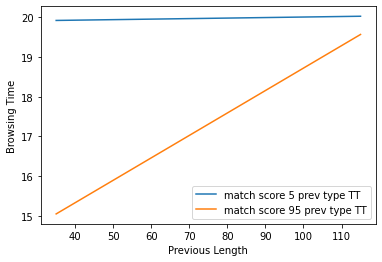

In [32]:
plt.plot(match_score_5_TT['Prev_Length'].values, match_score_5_TT['Browse_time'].values ,
             label = 'match score 5 prev type TT')

plt.plot(match_score_95_TT['Prev_Length'].values, match_score_95_TT['Browse_time'].values ,
          label = 'match score 95 prev type TT')

plt.legend()
plt.ylabel('Browsing Time')
plt.xlabel('Previous Length')
plt.show()

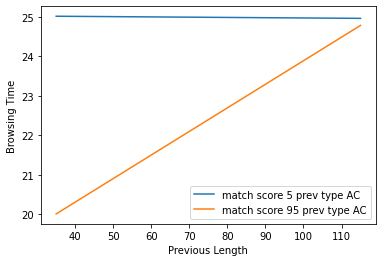

In [33]:
plt.plot(match_score_5_AC['Prev_Length'].values, match_score_5_AC['Browse_time'].values ,
             label = 'match score 5 prev type AC')

plt.plot(match_score_95_AC['Prev_Length'].values, match_score_95_AC['Browse_time'].values ,
          label = 'match score 95 prev type AC')

plt.legend()
plt.ylabel('Browsing Time')
plt.xlabel('Previous Length')
plt.show()

In [34]:
### Match score 95 prev type agnostic
match_score_5  = df[(df['Match_Score'] == 5)][['Prev_Length','Browse_time']]

### Match score 5 prev type AC
match_score_95  = df[ (df['Match_Score'] == 95)][['Prev_Length','Browse_time']]

match_score_5 = match_score_5.groupby( by = ['Prev_Length']).mean().reset_index()
match_score_95 = match_score_95.groupby( by = ['Prev_Length']).mean().reset_index()

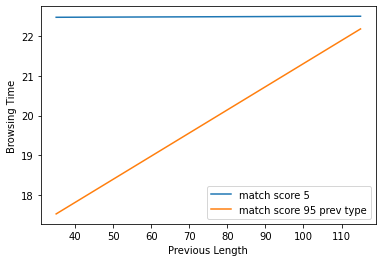

In [35]:
plt.plot(match_score_5['Prev_Length'].values, match_score_5['Browse_time'].values ,
             label = 'match score 5')

plt.plot(match_score_95['Prev_Length'].values, match_score_95['Browse_time'].values ,
          label = 'match score 95 prev type')

plt.legend()
plt.ylabel('Browsing Time')
plt.xlabel('Previous Length')
plt.show()

In [36]:
match_score_5 = match_score_5.groupby( by = ['Prev_Length']).mean().reset_index()
match_score_95 = match_score_95.groupby( by = ['Prev_Length']).mean().reset_index()

In [37]:
### initial guess for checks prev type should be TT(teaser)

In [38]:
match_score_5

,Prev_Length,Browse_time
0,35,22.466890
1,115,22.492915


In [47]:
# match_score_95()

In [48]:
# try preview length 30 

In [41]:
## our current minimum is at (preview length = 35 and match score is 95)

## HP Testing of Prev_type

In [6]:
project_df = pd.read_csv('RESULTS_azxcvbnm_2022-01-16.csv')

In [7]:
project_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)

In [11]:
df1 = project_df
df1

,Prev_Length,Match_Score,Tile_size,Prev_type,Browse_time
0,35,5,0.15,TT,19.874719
1,115,5,0.15,TT,19.366768
2,35,95,0.15,TT,15.143392
3,115,95,0.15,TT,21.411977
4,35,5,0.45,TT,17.890835
...,...,...,...,...,...
1595,115,95,0.15,AC,25.463533
1596,35,5,0.45,AC,23.154255
1597,115,5,0.45,AC,25.098558
1598,35,95,0.45,AC,20.951288


<li> Let all other factors being equal, we only test the Prev_type

In [12]:
cond1_df = df1[(df1.Prev_Length==35)&(df1.Match_Score==5)&(df1.Tile_size==0.15)&(df1.Prev_type=="AC")]

In [13]:
cond2_df = df1[(df1.Prev_Length==35)&(df1.Match_Score==5)&(df1.Tile_size==0.15)&(df1.Prev_type=="TT")]

In [14]:
# from scipy import stats

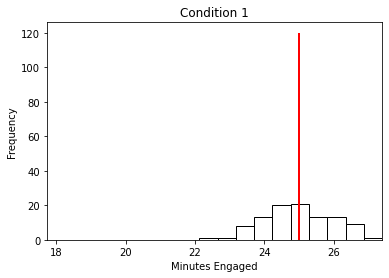

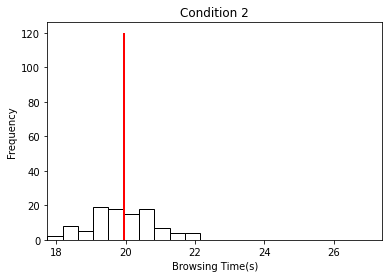

In [93]:
cond1 = cond1_df["Browse_time"]
cond2 = cond2_df["Browse_time"]
xmin = min(min(cond1), min(cond2))
xmax = max(max(cond1), max(cond2))
plt.figure()
plt.hist(cond1, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("Condition 1")
plt.vlines(x = np.mean(cond1), ymin = 0, ymax = 120, color = "red", linewidth = 2)
plt.figure()
plt.hist(cond2, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Browsing Time(s)")
plt.ylabel("Frequency")
plt.title("Condition 2")
plt.vlines(x = np.mean(cond2), ymin = 0, ymax = 120, color = "red", linewidth = 2)

In [96]:
#F-test
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)# test statistic

t = 1.1422438863867455


In [97]:
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
#cdf gives the left tail probability
print("p-value =", pv)


p-value = 1.4905722586884171


<li> We fail to reject the hypothesis that the variance of each two condition is not equal

$$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$

In [100]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 37.1651025892116
p-value = 1.6001627358171162e-91


<li> We reject the hypothesis and we draw the conclusion that TT's browsing time is less than AC
<li> We will us TT in the following test

## Further study

### Step2.1

In [37]:
step2_df = pd.read_csv('RESULTS_azxcvbnm_2022-01-16_step2.csv')

In [38]:
step2_df.groupby(by = ['Prev.Length', 'Match.Score']).mean().reset_index()[['Prev.Length', 'Match.Score', 'Browse.Time']]

,Prev.Length,Match.Score,Browse.Time
0,30,90,15.308083
1,30,100,16.910158
2,40,90,13.820807
3,40,100,15.211392
4,45,90,13.632778
5,45,100,15.021115


In [39]:
step2_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)

$$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$

In [40]:
def t_test(df, prev_length1,match_score1,prev_length2,match_score2,moi="Browse_time"):
    cond1_df = df[(df.Prev_Length==prev_length1)&(df.Match_Score==match_score1)]
    cond2_df = df[(df.Prev_Length==prev_length2)&(df.Match_Score==match_score2)]
    cond1 = cond1_df["Browse_time"]
    cond2 = cond2_df["Browse_time"]
    #F-test
    t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
    pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
    if pv<0.05:
        var = False
    else:
        var = True
    #T-test
    t, pv = stats.ttest_ind(cond1, cond2, equal_var = var, alternative = 'greater')
    return pv

In [41]:
pv1 = t_test(step2_df,30,100,40,100)
pv2 = t_test(step2_df,40,100,45,100)
pv3 = t_test(step2_df,30,100,45,100)

In [42]:
p = [pv1,pv2,pv3]
M = len(p)
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True False  True]
The adjusted p-values are:  [1.38674872e-26 2.40611247e-01 1.70882662e-33]


In [43]:
#30 45
pv4 = t_test(step2_df,30,90,40,90)
pv5 = t_test(step2_df,40,90,45,90)
pv6 = t_test(step2_df,30,90,45,90)
p = [pv4,pv5,pv6]
M = len(p)
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True False  True]
The adjusted p-values are:  [4.93942733e-19 2.61526010e-01 1.74723544e-25]


In [44]:
#match score
pv7 = t_test(step2_df,30,100,30,90)
pv8 = t_test(step2_df,40,100,40,90)
pv9 = t_test(step2_df,45,100,45,90)
p = [pv7,pv8,pv9]
M = len(p)
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True  True  True]
The adjusted p-values are:  [1.75191192e-23 8.47327297e-18 4.96676156e-22]


In [45]:
step2_df.groupby(by=['Prev_Length', 'Match_Score']).mean().reset_index()

,Prev_Length,Match_Score,Tile_size,Browse_time
0,30,90,0.15,15.308083
1,30,100,0.15,16.910158
2,40,90,0.15,13.820807
3,40,100,0.15,15.211392
4,45,90,0.15,13.632778
5,45,100,0.15,15.021115


<li> Even though there are interactive effect between match score and preview length, we see when match score are equal, the preview_length =45 group is statistic significant better than preview_length =30.
<li> When preview_length are equal, we see match score = 90 is statistic significant better than match score = 100
<li> So we form the hypothesis that the combination of <b>Increase preview length and decrease match score</b> could lead us to a near optimum point. 

### Step2.2

step3
Points checked: (preview_len, match score): 
(50,85)(50,80)


In [46]:
step3_df = pd.read_csv('RESULTS_azxcvbnm_step3_2022-01-17.csv')
step4_df = pd.read_csv('RESULTS_azxcvbnm_step4_2022-01-17.csv')
step3_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
step4_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
frames = [step2_df,step3_df,step4_df]#We concat them together and 
step3_df = pd.concat(frames)

In [47]:
pv_10 = t_test(step3_df,50,85,55,75)
pv_11 = t_test(step3_df,50,85,55,75)
pv_12 = t_test(step3_df,45,90,55,70)
pv_13 = t_test(step3_df,55,70,55,75)#this tells us when match score goes down to 70
pv_14 = t_test(step3_df,50,80,55,75)
p = [pv_10,pv_11,pv_12,pv_13,pv_14]
M = len(p)
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True  True  True  True False]
The adjusted p-values are:  [1.81451766e-07 1.81451766e-07 2.00792647e-05 1.21280776e-12
 1.00000000e+00]


In [48]:
step3_df.groupby(by=['Prev_Length', 'Match_Score']).mean().reset_index()

,Prev_Length,Match_Score,Tile_size,Browse_time
0,30,90,0.15,15.308083
1,30,100,0.15,16.910158
2,40,90,0.15,13.820807
3,40,100,0.15,15.211392
4,45,90,0.15,13.632778
5,45,100,0.15,15.021115
6,50,80,0.15,11.987524
7,50,85,0.15,12.762031
8,55,70,0.15,13.024942
9,55,75,0.15,11.946941


step4
Points checked: (preview_len, match score): 
(55,75)(55,70)

<li> we find that when the match preview length=55 and match score = 75 and preview length = 50 and match score =80 are statistc significant better than other methods.
<li> we suspect that we've reach a point where the <b>best match score is between 70-80

### step2.3

In [49]:
step5_df = pd.read_csv('RESULTS_azxcvbnm_step5_2022-01-17.csv')
step6_df = pd.read_csv('RESULTS_azxcvbnm_step6_2022-01-17.csv')
step5_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
step6_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
frames = [step3_df,step5_df,step6_df]#We concat them together and 
step4_df = pd.concat(frames)

In [50]:
pv_15 = t_test(step4_df,55,75,80,73)
pv_16 = t_test(step4_df,50,80,80,73)

pv_17 = t_test(step4_df,60,77,80,73)
pv_18 = t_test(step4_df,60,73,80,73)
pv_19 = t_test(step4_df,70,73,80,73)

p = [pv_15,pv_16,pv_17,pv_18,pv_19]
M = len(p)
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True  True  True  True False]
The adjusted p-values are:  [1.90425778e-21 1.13310454e-21 3.42715748e-16 3.54604234e-11
 7.90877630e-01]


<li>Still, as we increase the preview_time, we can see a statistic significant better result.
<li>But, we seems reach near minimum in preview_time between 70-80
    

In [51]:
step4_df.groupby(by=['Prev_Length', 'Match_Score']).mean().reset_index()

,Prev_Length,Match_Score,Tile_size,Browse_time
0,30,90,0.15,15.308083
1,30,100,0.15,16.910158
2,40,90,0.15,13.820807
3,40,100,0.15,15.211392
4,45,90,0.15,13.632778
5,45,100,0.15,15.021115
6,50,80,0.15,11.987524
7,50,85,0.15,12.762031
8,55,70,0.15,13.024942
9,55,75,0.15,11.946941


In [52]:
# t_test(step4_df,60,73,60,75)

### step2.4

In [54]:
step7_df = pd.read_csv('RESULTS_azxcvbnm_step7_2022-01-19.csv')
step7_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
frames = [step4_df,step7_df]#We concat them together and 
step5_df = pd.concat(frames)
step5_df.groupby(by=['Prev_Length', 'Match_Score']).mean().reset_index()

,Prev_Length,Match_Score,Tile_size,Browse_time
0,30,90,0.15,15.308083
1,30,100,0.15,16.910158
2,40,90,0.15,13.820807
3,40,100,0.15,15.211392
4,45,90,0.15,13.632778
5,45,100,0.15,15.021115
6,50,80,0.15,11.987524
7,50,85,0.15,12.762031
8,55,70,0.15,13.024942
9,55,75,0.15,11.946941


step5
Points checked: (preview_len, match score): 
(60,75)(60,73)(60,77)

step6
Points checked: (preview_len, match score): 
(70,73)(80,73)

In [53]:
### we proposed the hypothesis that Increase preview length and decrease match score

### step2.5

In [56]:
step8_df = pd.read_csv('RESULTS_azxcvbnm_step8_2022-01-19.csv')
step8_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
frames = [step5_df,step8_df]#We concat them together and 
step5_df = pd.concat(frames)
step5_df.groupby(by=['Prev_Length', 'Match_Score']).mean().reset_index()

,Prev_Length,Match_Score,Tile_size,Browse_time
0,30,90,0.15,15.308083
1,30,100,0.15,16.910158
2,40,90,0.15,13.820807
3,40,100,0.15,15.211392
4,45,90,0.15,13.632778
5,45,100,0.15,15.021115
6,50,80,0.15,11.987524
7,50,85,0.15,12.762031
8,55,70,0.15,13.024942
9,55,75,0.15,11.946941


In [61]:
# step8: (75,75)(75,80)(75,70)

In [ ]:
#step9 (80,75)(80,78)(80,70)(70,78)(70,75)(70,70)

In [73]:
pv_20 = t_test(step5_df,70,73,75,75)
pv_21 = t_test(step5_df,80,73,75,75)
# pv_16 = t_test(step4_df,50,80,80,73)

# pv_17 = t_test(step4_df,60,77,80,73)
# pv_18 = t_test(step4_df,60,73,80,73)
# pv_19 = t_test(step4_df,70,73,80,73)

p = [pv_20,pv_21]
M = len(p)
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True False]
The adjusted p-values are:  [0.00663978 0.10970592]


### step2.6


In [63]:
step9_df = pd.read_csv('RESULTS_azxcvbnm_step9.csv')
step9_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
frames = [step5_df,step9_df]#We concat them together and 
step6_df = pd.concat(frames)
step6_df.groupby(by=['Prev_Length', 'Match_Score']).mean().reset_index()

,Prev_Length,Match_Score,Tile_size,Browse_time
0,30,90,0.15,15.308083
1,30,100,0.15,16.910158
2,40,90,0.15,13.820807
3,40,100,0.15,15.211392
4,45,90,0.15,13.632778
5,45,100,0.15,15.021115
6,50,80,0.15,11.987524
7,50,85,0.15,12.762031
8,55,70,0.15,13.024942
9,55,75,0.15,11.946941


In [70]:
pv_22 = t_test(step6_df,75,80,75,75)
pv_23 = t_test(step6_df,70,78,75,75)
pv_24 = t_test(step6_df,70,70,75,75)
# pv_24 = t_test(step6_df,60,77,80,73)
# pv_25 = t_test(step6_df,60,73,80,73)
# pv_26 = t_test(step6_df,70,73,80,73)

p = [pv_22,pv_23,pv_24]
M = len(p)
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True  True False]
The adjusted p-values are:  [0.00524838 0.04894233 0.27695968]


In [112]:
stepD_df = pd.read_csv('RESULTS_azxcvbnm_best_default_2022-01-21.csv')
stepD_df.rename(columns = {'Tile.Size': 'Tile_size', 'Prev.Type':'Prev_type', 
                             'Browse.Time': 'Browse_time','Prev.Length':'Prev_Length'
                            ,'Match.Score':'Match_Score'}, inplace = True)
stepD_df.groupby(by=['Prev_Length', 'Match_Score']).mean().reset_index()

,Prev_Length,Match_Score,Tile_size,Browse_time
0,75,75,0.15,9.988621
1,75,95,0.20,14.780150


## Final choice and confidence interval

In [89]:
def distribution_plot(df, prev_length1,match_score1,prev_length2,match_score2):
    cond1_df = df[(df.Prev_Length==prev_length1)&(df.Match_Score==match_score1)]
    cond2_df = df[(df.Prev_Length==prev_length2)&(df.Match_Score==match_score2)]  
    cond1 = cond1_df["Browse_time"]
    cond2 = cond2_df["Browse_time"]
    xmin = min(min(cond1), min(cond2))
    xmax = max(max(cond1), max(cond2))
    plt.figure()
    plt.hist(cond1, color = "white", edgecolor = "black")
    plt.xlim(xmin,xmax)
    plt.xlabel("Minutes Engaged")
    plt.ylabel("Frequency")
    plt.title("Condition:"f'{prev_length1,match_score1}')
    plt.vlines(x = np.mean(cond1), ymin = 0, ymax = 120, color = "red", linewidth = 2)
    plt.figure()
    plt.hist(cond2, color = "white", edgecolor = "black")
    plt.xlim(xmin,xmax)
    plt.xlabel("Browsing Time(s)")
    plt.ylabel("Frequency")
    plt.title("Condition:"f'{prev_length2,match_score2}')
    plt.vlines(x = np.mean(cond2), ymin = 0, ymax = 120, color = "red", linewidth = 2)

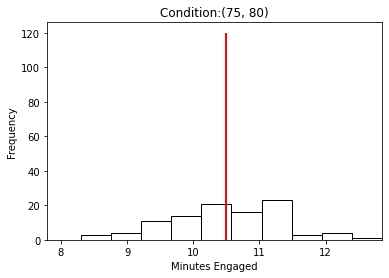

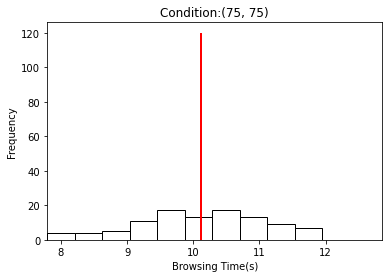

In [90]:
distribution_plot(step6_df,75,80,75,75)

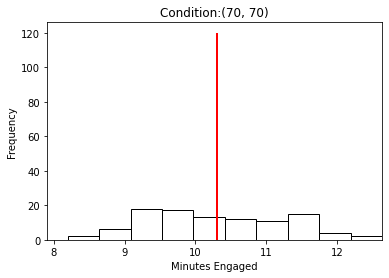

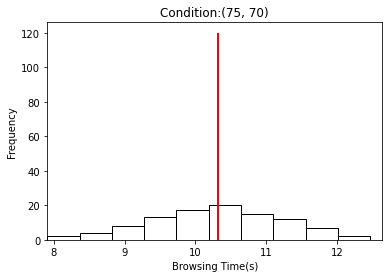

In [91]:
distribution_plot(step6_df,70,70,75,70)

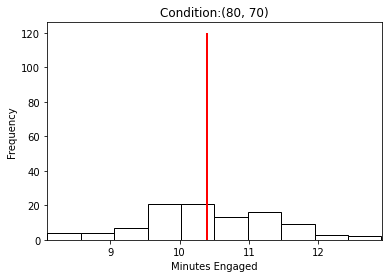

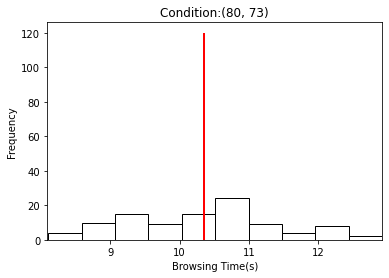

In [92]:
distribution_plot(step6_df,80,70,80,73)

In [104]:
def confidence_interval(df,prev_length,match_score):
    a = np.array(df[(df.Prev_Length==prev_length)&(df.Match_Score==match_score)]["Browse_time"])
    return stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))

In [105]:
confidence_interval(step6_df,75,80)

(10.327109413668087, 10.668534618029337)

In [106]:
confidence_interval(step6_df,75,75)#this one is the best

(9.923811992632668, 10.307159742624584)

In [108]:
confidence_interval(step6_df,70,78)

(10.21394438870409, 10.632628019314643)

In [109]:
confidence_interval(step6_df,70,70)

(10.103422597408109, 10.495387297172044)

In [110]:
confidence_interval(step6_df,75,70)

(10.127373071678033, 10.499414601593692)

In [111]:
confidence_interval(step6_df,80,70)

(10.196265900192452, 10.581775449358853)